# Dataset preparation

In [1]:
import pandas as pd

In [2]:
# Get the embeddings
embeddings = pd.read_csv("data/OsmoticStress_with_binary_positions_and_embeddings.csv", index_col=0)
embeddings = embeddings.drop(columns=["full_sequence"])

# Get the dataset
df = pd.read_csv('data/OsmoticStress_with_binary_positions.csv')
df.drop(columns=['full_sequence', 'Peptide_sequence'], inplace=True)
df.set_index('Uniprot_ID', inplace=True)

# Merge the two and get the final dataset
dataset = df.merge(embeddings, left_index=True, right_index=True)

In [12]:
dataset.head()

,Log2FC(LiP_norm),Binary_Positions,full_embedding
Uniprot_ID,,,
A5Z2X5,-0.153604,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[8848178386688232, 7881519943475723, 428928285..."
A5Z2X5,-1.869623,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[8848178386688232, 7881519943475723, 428928285..."
D6VTK4,-0.008114,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[47565970569849014, 7273535244166851, 22035147..."
O13297,-0.374875,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[21353999618440866, 15769580379128456, 4766600..."
O13297,-0.207803,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[21353999618440866, 15769580379128456, 4766600..."


In [4]:
import re

def convert_to_list(number_string):
    cleaned_string = re.sub(r"[^\d,\s]", "", number_string)
    return list(map(int, cleaned_string.split(',')))

dataset['full_embedding'] = dataset['full_embedding'].apply(convert_to_list)
dataset['Binary_Positions'] = dataset['Binary_Positions'].apply(convert_to_list)

# Creating combined embedding

In [10]:
import torch
import torch.nn as nn
import numpy as np

embedding_array = np.array(dataset['full_embedding'].tolist(), dtype=np.float32)
full_embedding = torch.tensor(embedding_array)

position_embedding_dim = len(dataset.iloc[0, 2]) 
num_positions = 20
position_embedding = nn.Embedding(num_embeddings=num_positions, embedding_dim=position_embedding_dim)

position_indices = torch.tensor([x[0] for x in dataset['Binary_Positions']])

position_embed = position_embedding(position_indices)

combined_embeddings = position_embed + full_embedding

combined_embeddings_list = combined_embeddings.tolist()

In [11]:
# Create a new DataFrame using the original DataFrame's index
X = pd.DataFrame(combined_embeddings_list, index=dataset.index)

In [15]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
Uniprot_ID,,,,,,,,,,,,,,,,,,,,,
A5Z2X5,8.848179e+15,7.881520e+15,4.289283e+16,1.710427e+16,7.472561e+15,1.246796e+15,2.859221e+15,4.647810e+14,3.386821e+13,7.752636e+15,...,5.445937e+15,5.214862e+16,5.950918e+15,2.992804e+15,2.186712e+16,2.490647e+16,9.536843e+15,2.424401e+16,3.110352e+15,3.304118e+15
A5Z2X5,8.848179e+15,7.881520e+15,4.289283e+16,1.710427e+16,7.472561e+15,1.246796e+15,2.859221e+15,4.647810e+14,3.386821e+13,7.752636e+15,...,5.445937e+15,5.214862e+16,5.950918e+15,2.992804e+15,2.186712e+16,2.490647e+16,9.536843e+15,2.424401e+16,3.110352e+15,3.304118e+15
D6VTK4,4.756597e+16,7.273535e+15,2.203515e+14,6.608049e+14,3.326045e+15,7.376782e+15,1.223982e+16,1.203883e+16,1.552944e+16,5.348460e+15,...,5.309712e+15,6.676825e+15,7.294690e+15,5.301362e+16,2.983132e+15,3.740367e+15,1.510385e+16,1.461948e+16,4.779517e+16,6.978594e+14
O13297,2.135400e+16,1.576958e+16,4.766600e+16,1.534467e+16,2.267701e+15,5.980504e+15,3.956593e+15,9.986967e+15,2.456207e+15,3.738843e+16,...,9.076984e+15,8.298277e+15,4.864088e+15,2.892880e+15,2.022724e+15,3.994240e+15,6.644006e+15,1.113248e+16,3.134675e+16,7.254029e+14
O13297,2.135400e+16,1.576958e+16,4.766600e+16,1.534467e+16,2.267701e+15,5.980504e+15,3.956593e+15,9.986967e+15,2.456207e+15,3.738843e+16,...,9.076984e+15,8.298277e+15,4.864088e+15,2.892880e+15,2.022724e+15,3.994240e+15,6.644006e+15,1.113248e+16,3.134675e+16,7.254029e+14


In [14]:
y = dataset['Log2FC(LiP_norm)']

In [16]:
y.head()

Uniprot_ID
A5Z2X5   -0.153604
A5Z2X5   -1.869623
D6VTK4   -0.008114
O13297   -0.374875
O13297   -0.207803
Name: Log2FC(LiP_norm), dtype: float64

In [29]:
y.describe()

count    31845.000000
mean         0.012023
std          0.737724
min        -14.358960
25%         -0.279373
50%         -0.001335
75%          0.298124
max         10.948098
Name: Log2FC(LiP_norm), dtype: float64

# Model Training

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy

# Model definition based on suggestion
class PeptideRegressor(nn.Module):
    def __init__(self, input_dim, num_heads, dropout_rate):
        super(PeptideRegressor, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, dropout=dropout_rate, batch_first=True)
        self.pooling = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(input_dim, 1) 

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        transposed = attn_output.transpose(1, 2)
        pooled = self.pooling(transposed)
        flattened = pooled.squeeze(-1)
        output = self.fc(flattened)
        return output

# Train test split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Reshape the data for the model, because it expects tensor with the whole sequence as the first dimension
X_train = X_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)

# Initialize the model
input_dim = 1280  # number of features in each peptide embedding
num_heads = 4     # number of attention heads
dropout_rate = 0.01
model = PeptideRegressor(input_dim=input_dim, num_heads=num_heads, dropout_rate=dropout_rate)

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training settings
n_epochs = 5
batch_size = 10
best_val_loss = float('inf')
train_losses = []
val_losses = []

# Training loop
for epoch in range(n_epochs):
    model.train()
    batch_losses = []
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    train_losses.append(sum(batch_losses) / len(batch_losses))
    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}')

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = loss_fn(y_pred, y_test)
        mae = nn.L1Loss()(y_pred, y_test)

        val_loss = mse
        val_losses.append(val_loss.item())
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model = copy.deepcopy(model.state_dict())
        print(f'Epoch {epoch+1}, Test MSE: {mse.item()}, Test MAE: {mae.item()}')

Epoch 1, Train Loss: 0.6570784140478468
Epoch 1, Test MSE: 0.5051465034484863, Test MAE: 0.453008770942688
Epoch 2, Train Loss: 0.5379816188907142
Epoch 2, Test MSE: 0.5138677954673767, Test MAE: 0.461489200592041
Epoch 3, Train Loss: 0.4981010131496151
Epoch 3, Test MSE: 0.5393855571746826, Test MAE: 0.48114877939224243


KeyboardInterrupt: 

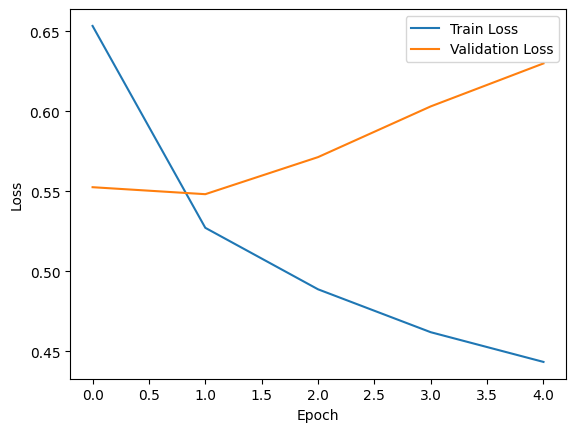

In [ ]:
# plot the training and validation losses
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [41]:
# Test model in test set
# Just run one time!

model.load_state_dict(best_model)
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    test_mse = loss_fn(y_test_pred, y_test)
    print(f'Final Test MSE: {test_mse.item()}')

Final Test MSE: 0.5482683777809143
